<a href="https://colab.research.google.com/github/iamanupadhyay/workshop-jupi/blob/master/Day3_handsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




Medical X-ray Image Classification using Convolutional Neural Network

1 The Dataset that we are going to use for the image classification is Chest X-Ray images, which consists of 2 categories, Pneumonia and Normal.The data set is organised into 3 folders (train, test, val) and contains subfolders for each image category Opacity(viz. Pneumonia) & Normal. 
https://www.kaggle.com/datasets/pcbreviglieri/pneumonia-xray-images


In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"iamanupadhyay","key":"6d4e1f9354e53dda61f7cd6eba73623d"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [4]:
! kaggle datasets download -d pcbreviglieri/pneumonia-xray-images

100% 1.14G/1.14G [00:32<00:00, 33.9MB/s]
100% 1.14G/1.14G [00:33<00:00, 37.1MB/s]


In [5]:
! unzip pneumonia-xray-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/normal/IM-0435-0001-0001.jpeg  
  inflating: train/normal/IM-0435-0001.jpeg  
  inflating: train/normal/IM-0437-0001-0001.jpeg  
  inflating: train/normal/IM-0437-0001-0002.jpeg  
  inflating: train/normal/IM-0437-0001.jpeg  
  inflating: train/normal/IM-0438-0001.jpeg  
  inflating: train/normal/IM-0439-0001-0001.jpeg  
  inflating: train/normal/IM-0439-0001-0002.jpeg  
  inflating: train/normal/IM-0439-0001.jpeg  
  inflating: train/normal/IM-0440-0001.jpeg  
  inflating: train/normal/IM-0441-0001.jpeg  
  inflating: train/normal/IM-0442-0001.jpeg  
  inflating: train/normal/IM-0444-0001.jpeg  
  inflating: train/normal/IM-0445-0001.jpeg  
  inflating: train/normal/IM-0446-0001.jpeg  
  inflating: train/normal/IM-0447-0001.jpeg  
  inflating: train/normal/IM-0448-0001.jpeg  
  inflating: train/normal/IM-0449-0001.jpeg  
  inflating: train/normal/IM-0450-0001.jpeg  
  inflating: train/normal/IM-0451-0001.jpeg  
  in

In [6]:
import matplotlib.pyplot as plt #For Visualization
import numpy as np #For handling arrays         
import pandas as pd # For handling data

In [7]:
#Define Directories for train, test & Validation Set
train_path = '/content/train'
test_path = '/content/test'
valid_path = '/content/val'

In [8]:
#The batch refers to the number of training examples utilized in one #iteration
batch_size = 16
#The dimension of the images we are going to define is 500x500
img_height = 500
img_width = 500 

# New section

**Preparing the Data**

**Data Augmentation** 
We will increase the size of the image training dataset artificially by performing some Image Augmentation technique such as rotation, flipping, cropping, or blurring a few pixels in the image.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                      rescale = 1./255,#rescale the scales array of the original image pixel values to be between [0,1]
                      shear_range = 0.2,#fixes one axis and stretches the image at a certain angle
                      zoom_range = 0.2,#image is enlarged by a zoom of less than 1.0. 
                      horizontal_flip = True,#images are flipped horizontally at random
                               )

# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

**Loading the Images**   
The Image Data Generator has a class known as flow from directory to read the images from folders containing images.

In [10]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size #Number of images to be generated by batch from the generator.
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False, #setting shuffle as False just so we can later compare it with predicted values without having indexing problem 
      class_mode='binary',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary', 
      batch_size=batch_size
      )

Found 4192 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


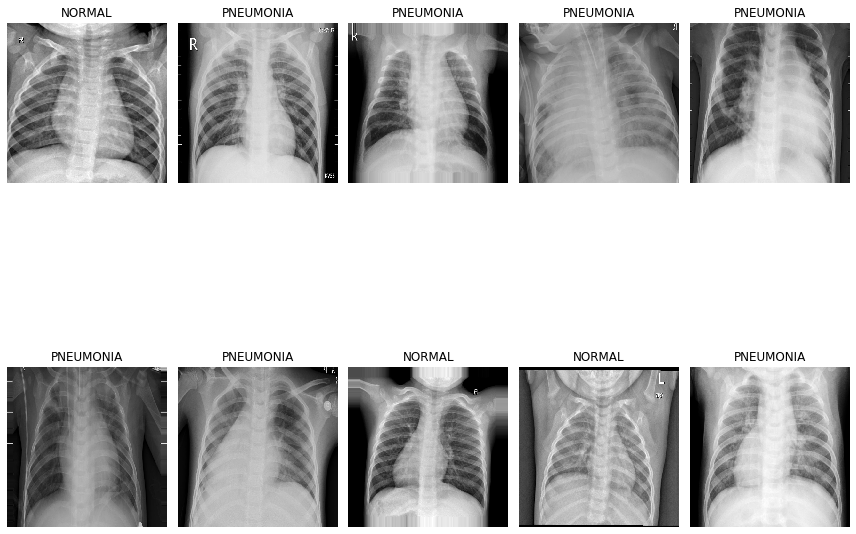

In [11]:
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'NORMAL', 1:'PNEUMONIA'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

**Convolutional Neural Network(CNN)**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

In [13]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 32)       0

**Visualize the CNN model**

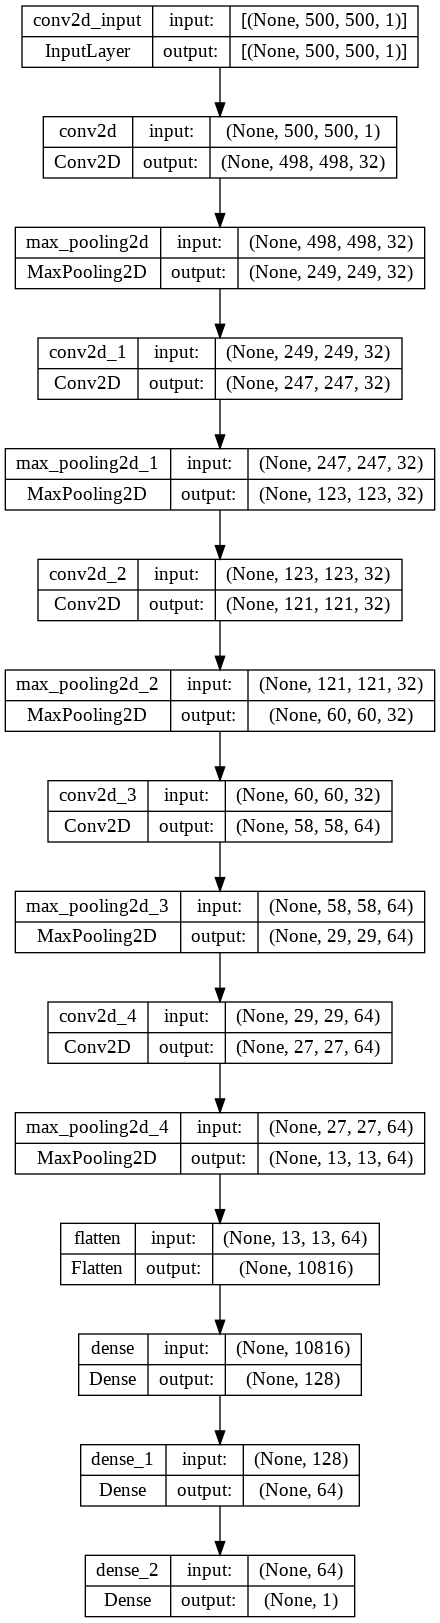

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

**Fit the model**

In [ ]:
cnn.fit(train,epochs=1, validation_data=valid, verbose = 1)

262/262 [==============================] - 120s 424ms/step - loss: 0.3744 - accuracy: 0.8387 - val_loss: 0.2659 - val_accuracy: 0.9163


**Evaluate**



Let’s visualize the progress of all metrics throughout the total epochs lifetime

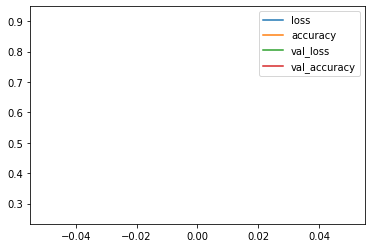

In [ ]:
pd.DataFrame(cnn.history.history).plot()

In [ ]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

39/39 [==============================] - 5s 132ms/step - loss: 0.6550 - accuracy: 0.7115
The testing accuracy is : 71.15384340286255 %


In [ ]:
preds = cnn.predict(test,verbose=1)

39/39 [==============================] - 5s 131ms/step


In [ ]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])

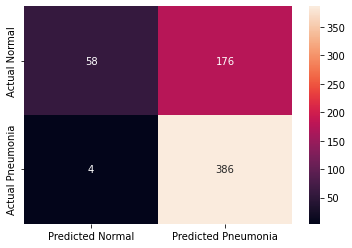

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.94      0.25      0.39       234
   PNEUMONIA       0.69      0.99      0.81       390

    accuracy                           0.71       624
   macro avg       0.81      0.62      0.60       624
weighted avg       0.78      0.71      0.65       624



In [ ]:
from sklearn.metrics import roc_auc_score
print('roc_auc_score = ' + str(roc_auc_score(test.classes, predictions)))

roc_auc_score = 0.6188034188034188


**ROC CURVE** The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values.

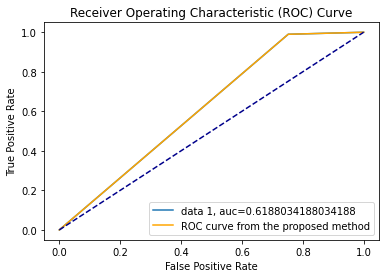

In [ ]:
import sklearn
from sklearn.metrics import classification_report
fpr, tpr, _ = sklearn.metrics.roc_curve(test.classes, predictions)
auc = sklearn.metrics.roc_auc_score(test.classes, predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot(fpr, tpr, color='orange', label='ROC curve from the proposed method')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
#     plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

